## Mineração de dados - Semana 3: 
### Exercício sobre análise descritiva de dados (ADD)

Neste exercício, iremos fazer a análise descritiva de uma base de dados com o objetivo de aplicar o conteúdo visto nesta semana. 

1. Crie um novo notebook e inclua uma descrição para ele. 

2. Nesta atividade, além da biblioteca **pandas**, vamos importar as bibliotecas **seaborn** e **matplotlib** para gerar os gráficos.

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set(rc={'figure.figsize':(15,8)})

A base de dados deste exercício é a "Quantidade de alunos por tipo de ensino" da rede estadual de São Paulo de 2021. A base tem 25 atributos, entre os quais estão:

* **MUN**: município
* **ZONA**: zona (1 = urbana, 2 - rural)
* **ANOS INICIAIS**: Anos iniciais do ensino fundamental
* **ANOS FINAIS**: Anos finais do ensino fundamental
* **ENSINO MEDIO**: Anos iniciais do ensino fundamental

Os dados estão sendo importados diretamente do [Portal de Dados Abertos da Educação do Estado de São Paulo](https://dados.educacao.sp.gov.br/dataset/quantidade-de-alunos-por-tipo-de-ensino-da-rede-estadual).
O dicionário de dados está disponível neste [link](https://dados.educacao.sp.gov.br/dicion%C3%A1rio-de-dados-de-quantidade-de-alunos-por-tipo-de-ensino)

3. Importe a base de dados direto da URL a seguir e verifique as primeiras linhas. O arquivo contém 50 registros. Olhando os 20 primeiros, podemos observar que há valores ausentes nos atributos **idade**, **uf** e **renda**. 



In [ ]:
url = 'https://dados.educacao.sp.gov.br/sites/default/files/Quantidade%20de%20alunos%20por%20tipo%20de%20ensino%20da%20rede%20estadual%20-%202021.csv'
escolas = pd.read_csv(url)
escolas.head(20)

,CDREDE,DE,CODMUN,MUN,CATEG,COD_ESC,TIPOESC,CODVINC,NOMESC,ENDESC,NUMESC,BAIESC,EMAIL,FONE1,ZONA,ED_INFANTIL,CLASSES ESPECIAIS,SALA DE RECURSO,ANOS INICIAIS,ANOS FINAIS,ENSINO MEDIO,EJA FUNDAMENTA_AI,EJA FUNDAMENTAL_AF,EJA ENSINO MEDIO
0,10101,NORTE 1,100,SAO PAULO,1,73,8,NaN,JULIO DE FARIA E SOUZA PROFESSOR,POMPEU PEQUENO DE SOUZA BRASIL,89,VILA FRANCOS,E000073A@EDUCACAO.SP.GOV.BR,38514186.0,1.0,0,0,0,456,0,0,0,0,0
1,10101,NORTE 1,100,SAO PAULO,1,127,8,NaN,JOSE ALTENFELDER SILVA PROFESSOR,CARLOS ALBERTO VANZOLINI,397,VILA DOS REMEDIOS,E000127A@EDUCACAO.SP.GOV.BR,36226586.0,1.0,0,0,9,717,0,0,0,0,0
2,10101,NORTE 1,100,SAO PAULO,1,139,8,NaN,MARIANO DE OLIVEIRA PROFESSOR,RUA ALMIRANTE ISAIAS DE NORONHA,13,VILA PEREIRA BARRETO,E000139A@EDUCACAO.SP.GOV.BR,39757083.0,1.0,0,0,0,0,372,1200,0,0,240
3,10101,NORTE 1,100,SAO PAULO,1,164,8,NaN,PIO TELLES PEIXOTO PROFESSOR,ARTUR ORLANDO,985,VILA JAGUARA,E000164A@EDUCACAO.SP.GOV.BR,36225997.0,1.0,0,0,10,0,251,336,0,0,63
4,10101,NORTE 1,100,SAO PAULO,1,231,8,NaN,CHIQUINHA RODRIGUES,CAIAPE,SN,VILA PENTEADO,E000231A@EDUCACAO.SP.GOV.BR,38510101.0,1.0,0,3,28,987,0,0,0,0,0
5,10101,NORTE 1,100,SAO PAULO,1,243,8,NaN,ISABEL VIEIRA DE SERPA E PAIVA PROFESSORA,JERIMANDUBA,561,JARAGUA,E000243A@EDUCACAO.SP.GOV.BR,39411734.0,1.0,0,0,28,462,0,0,0,0,0
6,10101,NORTE 1,100,SAO PAULO,1,395,8,NaN,JOAQUIM LUIZ DE BRITO PROFESSOR,RUA SANTA LUCIA FILIPPINI,65,ITABERABA,E000395A@EDUCACAO.SP.GOV.BR,39752467.0,1.0,0,0,0,0,280,413,0,0,157
7,10101,NORTE 1,100,SAO PAULO,1,644,8,NaN,PIO XII,OTAVIO DOMINGUITO,50,PIQUERI,E000644A@EDUCACAO.SP.GOV.BR,39764189.0,1.0,0,0,0,322,0,0,0,0,0
8,10101,NORTE 1,100,SAO PAULO,1,36959,8,NaN,MANUEL BANDEIRA,JULIO CESAR LEAL,15,VILA PERUS,E036959A@EDUCACAO.SP.GOV.BR,39156911.0,1.0,0,0,0,0,432,997,0,0,147
9,10101,NORTE 1,100,SAO PAULO,1,37655,8,NaN,UBALDO COSTA LEITE DOUTOR,JOSE DA COSTA PEREIRA,70,JARDIM GUARANI,E037655A@EDUCACAO.SP.GOV.BR,38513890.0,1.0,0,0,0,0,573,714,0,0,0


4. A função **info()**) mostra que há 5351 registros para a maioria dos atributos, portanto é o número de escolas.

In [ ]:
escolas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351 entries, 0 to 5350
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CDREDE              5351 non-null   int64  
 1   DE                  5351 non-null   object 
 2   CODMUN              5351 non-null   int64  
 3   MUN                 5351 non-null   object 
 4   CATEG               5351 non-null   int64  
 5   COD_ESC             5351 non-null   int64  
 6   TIPOESC             5351 non-null   int64  
 7   CODVINC             259 non-null    float64
 8   NOMESC              5351 non-null   object 
 9   ENDESC              5351 non-null   object 
 10  NUMESC              5327 non-null   object 
 11  BAIESC              5348 non-null   object 
 12  EMAIL               5273 non-null   object 
 13  FONE1               5328 non-null   float64
 14  ZONA                5350 non-null   float64
 15  ED_INFANTIL         5351 non-null   int64  
 16  CLASSE

### Distribuição de frequências

5. Vamos observar a distribuição de alguns atributos, gerando o histograma do atributo **ANOS INICIAIS** com a função **displot()**. 

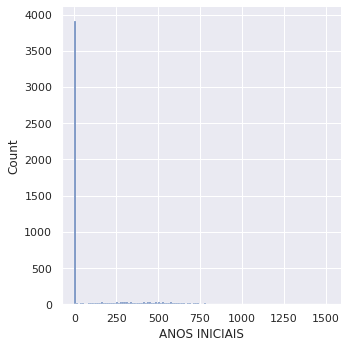

In [ ]:
sb.displot(escolas['ANOS INICIAIS'])
plt.show()

6. Os dados têm muitos valores 0 no campo **ANOS INICIAIS** porque há escolas que têm somente os anos finais do fundamental, outras têm somente ensino médio etc. Vamos filtrar os dados e ver novamente selecionando o valor de 10 pastas para o histograma.

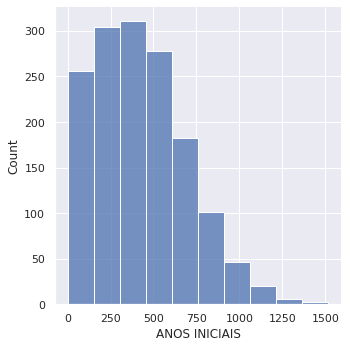

In [ ]:
filtro_escolas = escolas[escolas['ANOS INICIAIS'] > 0]
sb.displot(filtro_escolas['ANOS INICIAIS'],bins=10)
plt.show()

7. Vamos olhar o atributo **ANOS FINAIS**, já filtrando escolas sem alunos destes anos.

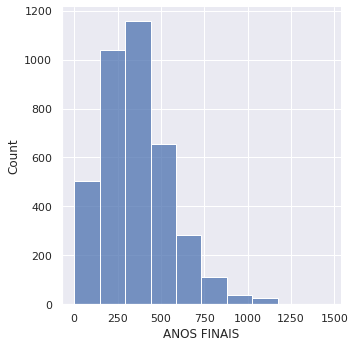

In [ ]:
filtro_escolas = escolas[escolas['ANOS FINAIS'] > 0]
sb.displot(filtro_escolas['ANOS FINAIS'],bins=10)
plt.show()

8. Para o atributo **ENSINO MEDIO** faremos igual.

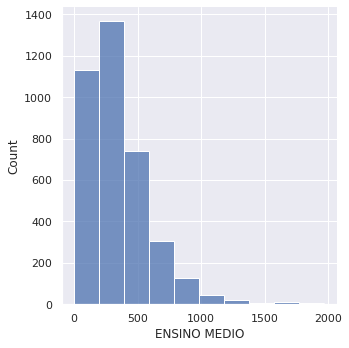

In [ ]:
filtro_escolas = escolas[escolas['ENSINO MEDIO'] > 0]
sb.displot(filtro_escolas['ENSINO MEDIO'],bins=10)
plt.show()

Podemos observar que a maioria das escolas nas três faixas de ensino tem uma maior concentração de estudantes na faixa de 250 a 500 alunos.

9. Que tal agora olharmos a proporção de alunos no ensino regular dos anos iniciais e finais do fundamental e do ensino médio? 

Vamos somar o total de alunos matriculados em cada período e gerar um gráfico de setores usando a função **pie()** do mattplotlib.

O total de alunos desses períodos é de mais de 3.3 milhões.

In [ ]:
fundamental_iniciais = escolas['ANOS INICIAIS'].sum()
fundamental_finais = escolas['ANOS FINAIS'].sum()
medio = escolas['ENSINO MEDIO'].sum()
(fundamental_iniciais + fundamental_finais + medio)

3319779

A soma dos valores de cada um dos três períodos serão os dados passados como uma lista **alunos** para a função **pie**. Vamos passar também os rótulos para identificar os dados como uma lista **periodo**. O parâmetro **autopct** coloca os percentuais dos dados no gráfico no formato desejado.

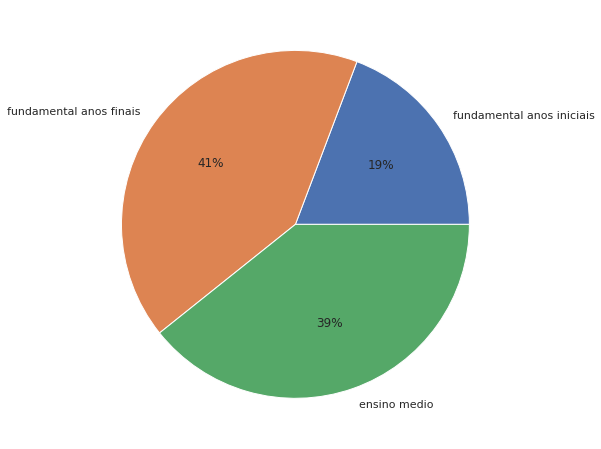

In [ ]:
alunos = [fundamental_iniciais,fundamental_finais,medio]
periodo = ['fundamental anos iniciais', 'fundamental anos finais', 'ensino medio']

plt.pie(alunos,labels=periodo,autopct = '%0.0f%%')
plt.show()

Assim, vemos que as maiores concentrações de alunos do ensino público estadual são do ensino fundamentais nos anos finais, seguido de perto pelos alunos do ensino médio.

Para simplificar o exemplo, não estamos considerando aqui os alunos do EJA (ensino de jovens e adultos) nem os alunos do ensino infantil.

### Posição relativa

10. Vamos seguir olhando as medidas de posição relativa dos dados usando o diagrama de caixa (gráfico boxplot) do ensino médio.

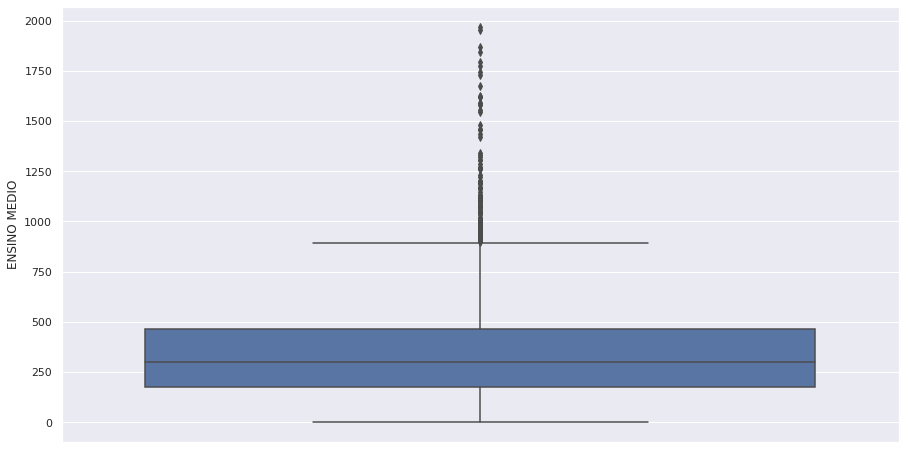

In [ ]:
filtro_escolas = escolas[escolas['ENSINO MEDIO'] > 0]
sb.boxplot(y=filtro_escolas['ENSINO MEDIO'])
plt.show()

O boxplot nos mostra que há uma grande concentração de escolas com aproximadamente de 200 a 500 estudantes do ensino médio.

### Tendência central e dispersão

11. A seguir, podemos ver as medidas de tendência central e dispersão desses dados com a função **describe()**, olhando a distribuição desses dados. Por exemplo, a média (mean) de alunos dos anos finais do ensino fundamental por escola é de ~257, com desvio padrão de 234,97. Podemos ver também os valores dos quartis para esse atributo.

In [ ]:
escolas['ANOS FINAIS'].describe()

count    5351.000000
mean      257.373388
std       234.971969
min         0.000000
25%         0.000000
50%       253.000000
75%       410.500000
max      1467.000000
Name: ANOS FINAIS, dtype: float64

12. Vamos agora olhar se há alguma correlação entre atributos desses dados?
Para isso vamos usar o gráfico de dispersão para comparar os atributos com a quantidade de alunos das escolas com estudantes do ensino fundamental dos anos iniciais e finais. 
Primeiro, filtramos escolas cujo número de estudantes seja maior que zero em ambos os casos. Depois, usamos a função **scatterplot()** para plotar os dados.

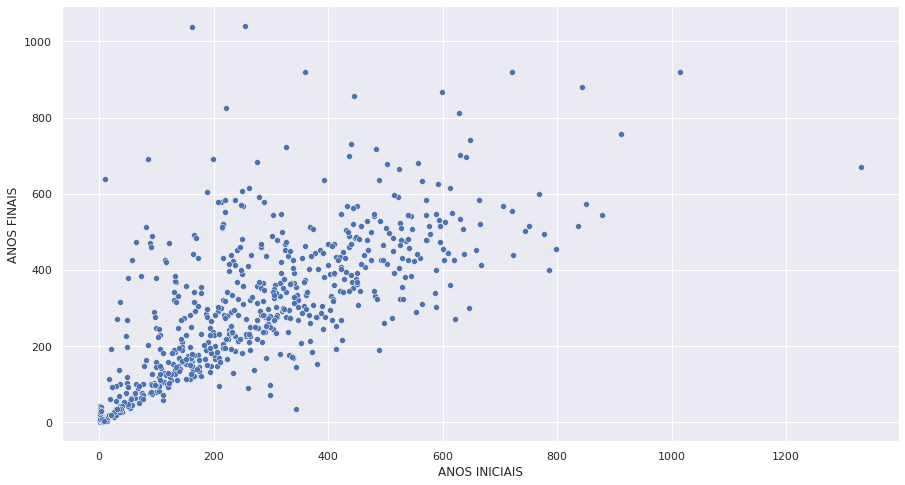

In [ ]:
filtro_escolas = escolas[(escolas['ANOS INICIAIS'] > 0) & (escolas['ANOS FINAIS'] > 0)]
sb.scatterplot(x=filtro_escolas['ANOS INICIAIS'],y=filtro_escolas['ANOS FINAIS'])
plt.show()

Embora haja alguma dispersão pelo gráfico, podemos ver uma grande concentração de escolas de ambos os períodos de ensino fundamental na faixa entre 1 e 600 estudantes, mostrando uma correlação positiva. Isso faz sentido, visto que filtramos escolas que abrigam os dois períodos de ensino e que, portanto, têm uma capacidade proporcional de alocar esses estudantes. Além do mais, a quantidade de estudantes tende a ser proporcional ao local na qual elas estão.

Com isso, concluímos o exercício de análise descritiva de dados desta semana. 
Para praticar mais, sugiro que você escolha um outro conjunto de dados do seu interesse e use ADD para conhecer melhor as características dos dados.

Algumas sugestões de bases são: 

* [Portal Brasileiro de Dados Abertos](https://dados.gov.br/)
* [Basedosdados.org](https://basedosdados.org/)
* [Kaggle](https://www.kaggle.com/datasets)